Iniciando el cálculo de promedios por lotes desde 'dataset_meda_derived_data.parquet'...
Procesando lotes del archivo...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:03<00:00, 22.08it/s]


Combinando resultados parciales...
Cálculo de promedios diarios completado.
Filas antes de filtrar valores atípicos: 1188
Filas después de filtrar: 1009
Generando el gráfico y guardando en 'grafico_04_presion_estacional.png'...


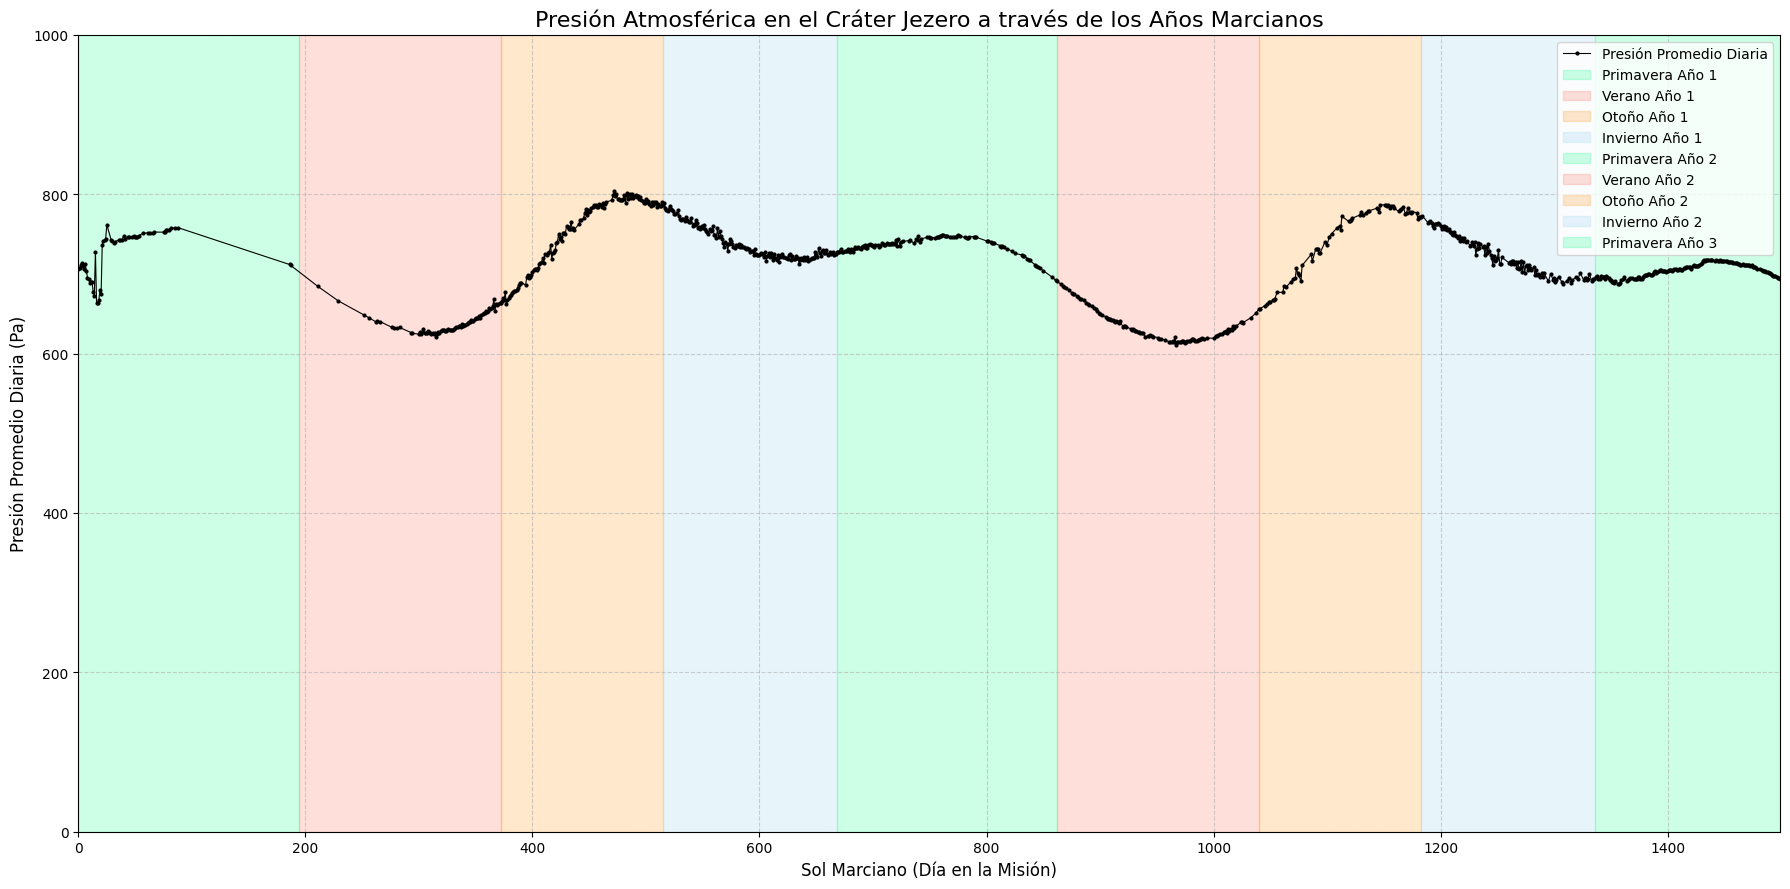

Proceso finalizado. El gráfico fue guardado en 'grafico_04_presion_estacional.png'.


In [1]:
# -*- coding: utf-8 -*-
"""
Análisis del Ciclo Estacional de la Presión Atmosférica en Marte.
Versión segura para RAM: Procesa el archivo Parquet por lotes para calcular
los promedios diarios de presión sin saturar la memoria.
"""

import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (18, 9)
RESOLUCION_DPI = 300
NOMBRE_ARCHIVO_SALIDA = "grafico_04_presion_estacional.png"

# Parámetros del análisis
ARCHIVO_DERIVADO = 'dataset_meda_derived_data.parquet'

# --- 2. FUNCIÓN DE CARGA Y PREPARACIÓN SEGURA ---

def calcular_promedios_diarios_seguro(ruta_archivo):
    """
    Carga un archivo Parquet por lotes y calcula el promedio de presión por sol.
    """
    print(f"Iniciando el cálculo de promedios por lotes desde '{ruta_archivo}'...")
    try:
        parquet_file = pq.ParquetFile(ruta_archivo)
        resultados_parciales = []
        
        print("Procesando lotes del archivo...")
        for i in tqdm(range(parquet_file.num_row_groups)):
            chunk = parquet_file.read_row_group(i, columns=['sol', 'PRESSURE']).to_pandas()
            agregado_parcial = chunk.groupby('sol')['PRESSURE'].agg(['sum', 'count'])
            resultados_parciales.append(agregado_parcial)
            
        print("Combinando resultados parciales...")
        df_agregado = pd.concat(resultados_parciales)
        df_final_agg = df_agregado.groupby('sol').sum()
        df_final_agg['PRESSURE'] = df_final_agg['sum'] / df_final_agg['count']
        
        presion_diaria = df_final_agg[['PRESSURE']].reset_index()
        print("Cálculo de promedios diarios completado.")
        return presion_diaria
        
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return pd.DataFrame()

# --- 3. FUNCIÓN DE GRAFICACIÓN ---

def generar_grafico_estacional(df_presion):
    """Genera el gráfico de serie de tiempo de la presión."""
    print(f"Generando el gráfico y guardando en '{NOMBRE_ARCHIVO_SALIDA}'...")
    plt.figure(figsize=TAMAÑO_FIGURA)
    
    plt.plot(df_presion['sol'], df_presion['PRESSURE'], color='black', linewidth=0.8, marker='.', markersize=4, label='Presión Promedio Diaria')

    # Anotaciones estacionales
    plt.axvspan(0, 194, color='springgreen', alpha=0.2, label='Primavera Año 1'); plt.axvspan(194, 372, color='tomato', alpha=0.2, label='Verano Año 1'); plt.axvspan(372, 515, color='darkorange', alpha=0.2, label='Otoño Año 1'); plt.axvspan(515, 668, color='skyblue', alpha=0.2, label='Invierno Año 1'); plt.axvspan(668, 862, color='springgreen', alpha=0.2, label='Primavera Año 2'); plt.axvspan(862, 1040, color='tomato', alpha=0.2, label='Verano Año 2'); plt.axvspan(1040, 1183, color='darkorange', alpha=0.2, label='Otoño Año 2'); plt.axvspan(1183, 1336, color='skyblue', alpha=0.2, label='Invierno Año 2'); plt.axvspan(1336, 1530, color='springgreen', alpha=0.2, label='Primavera Año 3');
    
    # Estilo y Títulos
    plt.title('Presión Atmosférica en el Cráter Jezero a través de los Años Marcianos', fontsize=16)
    plt.xlabel('Sol Marciano (Día en la Misión)', fontsize=12)
    plt.ylabel('Presión Promedio Diaria (Pa)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(loc='upper right')
    plt.xlim(0, df_presion['sol'].max())
    plt.ylim(0, 1000) # Se mantiene el filtro visual
    plt.tight_layout()

    # --- GUARDADO Y VISUALIZACIÓN ---
    plt.savefig(NOMBRE_ARCHIVO_SALIDA, dpi=RESOLUCION_DPI, bbox_inches='tight')
    plt.show()

# --- 4. Ejecución Principal ---
if __name__ == "__main__":
    datos_diarios = calcular_promedios_diarios_seguro(ARCHIVO_DERIVADO)
    
    if not datos_diarios.empty:
        # Filtrado de datos antes de graficar
        print(f"Filas antes de filtrar valores atípicos: {len(datos_diarios)}")
        datos_filtrados = datos_diarios[datos_diarios['PRESSURE'] < 1500]
        print(f"Filas después de filtrar: {len(datos_filtrados)}")
        
        # Le pasamos el dataframe ya filtrado a la función del gráfico
        generar_grafico_estacional(datos_filtrados)
        
        print(f"Proceso finalizado. El gráfico fue guardado en '{NOMBRE_ARCHIVO_SALIDA}'.")
    else:
        print("No se pudieron cargar los datos, el script se detendrá.")

## Análisis del Gráfico: Un Entorno Cíclico pero Inhóspito
Este gráfico, que muestra los ciclos estacionales de la presión, ofrece dos conclusiones contrapuestas pero igualmente importantes para la evaluación de la habitabilidad humana en Marte.

1. Confirma la Hostilidad Extrema del Entorno
La conclusión más inmediata es que la presión atmosférica es siempre y en todo momento letal para un ser humano sin protección.

Presión Insuficiente: La curva de presión oscila entre aproximadamente 600 y 850 Pa. Esto es, en el mejor de los casos, menos del 1% de la presión a nivel del mar en la Tierra (101.325 Pa). Es un vacío fisiológico que imposibilita la respiración.

Por Debajo del Límite de Armstrong: Más importante aún, toda la curva se encuentra muy por debajo del umbral crítico de 6300 Pa. Esto confirma que el ebullismo (la ebullición de los fluidos corporales) sería un riesgo constante e inmediato en cualquier momento del año marciano.

Desde un punto de vista biológico, el gráfico es una sentencia definitiva: la atmósfera marciana no ofrece ningún tipo de soporte vital.

2. Revela un Entorno Predecible y Consistente
A pesar de su hostilidad, el gráfico revela una característica sumamente valiosa: la previsibilidad.

Ciclos Regulares: La presión no varía de forma caótica, sino que sigue una onda sinusoidal casi perfecta que se repite cada año marciano (~668 soles). Vemos claramente que el patrón del "Año 2" es una repetición del "Año 1".

Ventaja para la Ingeniería: Esta regularidad es una ventaja enorme para la planificación de misiones y el diseño de tecnología. Permite a los ingenieros:

Predecir con exactitud las condiciones atmosféricas para operaciones críticas como el aterrizaje de futuras naves.

Diseñar hábitats y sistemas de soporte vital que estén preparados para soportar el rango exacto de presiones exteriores.

Anticipar fenómenos meteorológicos que dependen de estos ciclos de presión, como la formación de nubes o el inicio de la temporada de tormentas de polvo.

Conclusión para la Monografía
En resumen, el gráfico presenta una dualidad clave para la habitabilidad humana. Por un lado, cierra por completo la puerta a cualquier forma de supervivencia natural, demostrando cuantitativamente que el entorno es un vacío letal. Por otro lado, abre una ventana a la ingeniería informada, al revelar un sistema atmosférico con reglas claras y predecibles.

Por lo tanto, el gráfico no solo subraya los peligros, sino que también proporciona el conocimiento fundamental necesario para diseñar las soluciones tecnológicas que permitirían superarlos.

# Sobre la linea de tiempo

Un sol es simplemente un día en Marte. Es la unidad básica de tiempo, similar a nuestros días de 24 horas (aunque un sol dura un poquito más: 24 horas y 39 minutos).

Un año marciano es el tiempo que tarda el planeta Marte en dar una vuelta completa alrededor del Sol. Como Marte está más lejos del Sol que la Tierra, su órbita es mucho más larga y tarda más en completarla.

## La Relación Numérica
1 Año Marciano = 668.6 soles (lo redondeamos a 668 para simplificar).

1 Año Marciano ≈ 687 días terrestres (casi dos de nuestros años).

Pensalo como una pista de carreras: si la Tierra corre por el carril interior, Marte corre por uno exterior mucho más largo. Por eso, para completar una "vuelta" (un año), necesita muchísimos más "días" (soles).

## ¿Cómo se Refleja esto en tu Gráfico?
Cuando en tu gráfico marcamos las estaciones del "Año 1", "Año 2", etc., lo que estamos haciendo es agrupar esos 668 soles en un ciclo anual completo.

Año 1 de la misión: Abarca desde el Sol 0 hasta el Sol 668.

Año 2 de la misión: Abarca desde el Sol 668 hasta el Sol 1336.

Y así sucesivamente.

Cada uno de esos "años" contiene sus cuatro estaciones (primavera, verano, otoño, invierno), y cada estación marciana dura, en promedio, unos 167 soles (668 / 4). Por eso tu gráfico muestra esa onda que se repite cada ~668 soles: estás viendo el ciclo climático de un año marciano completo.